<h1> Importing Data </h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pop_princess = pd.read_csv('pop_princess.csv', sep = ',', decimal = '.')
olivia_poptrend = pd.read_csv('olivia_poptrend.csv', sep = ',', decimal = '.')
sabrina_poptrend = pd.read_csv('sabrina_poptrend.csv', sep = ',', decimal = '.')

<h1> Cleaning the Data </h1>

<p> One of the albums under Olivia Rodrigo's discography is "The Hunger Games: The Ballad of Songbirds & Snakes (Music From & Inspired By)" where she wrote and sang the song "Can't Catch Me Now." Because this is the only song she wrote, we will be removing the rest of the songs from this album in the data set. </p>

In [4]:
mask_album = pop_princess['album_name'] == 'The Hunger Games: The Ballad of Songbirds & Snakes (Music From & Inspired By)'
pop_princess.loc[mask_album, 'track_name']
pop_princess = pop_princess.drop([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

Several columns would not be of value during the data exploration, hence we remove these columns.

In [5]:
pop_princess['track_preview_url'].unique
pop_princess = pop_princess.drop(['analysis_url', 'disc_number', 'track_href', 'is_local', 'track_preview_url', 'type', 'track_uri', 'external_urls.spotify'], axis = 1)

Olivia Rodrigo and Sabrina Carpenter both have an album with a deluxe version (GUTS for Rodrigo and emails i can't send for Carpenter). In these deluxe versions, the songs that are also included in the original version have the same audio features as their counterparts in the deluxe version. However, their popularities differ greatly.

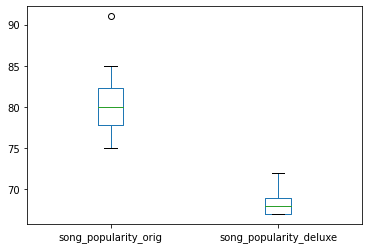

In [6]:
olivia_GUTS = pop_princess.loc[pop_princess['album_name'] == 'GUTS', ['track_name', 'song_popularity']]
olivia_GUTS_d = pop_princess.loc[pop_princess['album_name'] == 'GUTS (spilled)', ['track_name', 'song_popularity']]
olivia_deluxe = pd.merge(olivia_GUTS, olivia_GUTS_d, how="left", on=["track_name"], suffixes = ['_orig', '_deluxe'])

olivia_deluxe

olivia_deluxe.plot(kind = 'box')
plt.show()

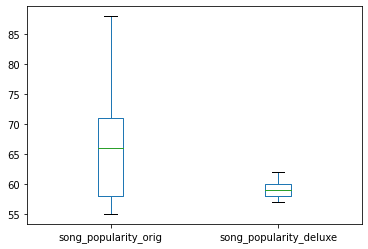

In [7]:
sabrina_eics = pop_princess.loc[pop_princess['album_name'] == "emails i can't send", ['track_name', 'song_popularity']]
sabrina_eics_d = pop_princess.loc[pop_princess['album_name'] == "emails i can't send fwd:", ['track_name', 'song_popularity']]
sabrina_deluxe = pd.merge(sabrina_eics, sabrina_eics_d, how="left", on=["track_name"], suffixes = ['_orig', '_deluxe'])

sabrina_deluxe

sabrina_deluxe.plot(kind = 'box')
plt.show()

From the visualizations, it appears that most tracks are more popular in the original album release compared to the deluxe album release except for the song "how many things", which received a higher popularity rating for its deluxe version. Hence, only the original releases of the songs will be considered aside from the song "how many things" by Sabrina Carpenter, in which we will use the more recent release.

In [8]:
deluxe_drop = []

for i in olivia_deluxe['track_name']:
    index = pop_princess.index[(pop_princess['album_name'] == "GUTS (spilled)") & (pop_princess['track_name'] == i)].tolist()
    deluxe_drop.append(index[0])

for i in sabrina_deluxe['track_name']:
    if (i == 'how many things'):
        index = pop_princess.index[(pop_princess['album_name'] == "emails i can't send") & (pop_princess['track_name'] == i)].tolist()
        deluxe_drop.append(index[0])
    else:
        index = pop_princess.index[(pop_princess['album_name'] == "emails i can't send fwd:") & (pop_princess['track_name'] == i)].tolist()
        deluxe_drop.append(index[0])
        
deluxe_drop

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 57,
 58,
 59,
 60,
 61,
 62,
 80,
 64,
 65,
 66,
 67,
 68,
 69]

In [9]:
pop_princess.drop(deluxe_drop)

,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,...,time_signature,duration_ms,explicit,track_name,track_number,album_name,key_name,mode_name,key_mode,song_popularity
12,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.683,0.587,8,...,4,170541,True,obsessed,13,GUTS (spilled),G#,major,G# major,86
13,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.507,0.580,7,...,4,121354,False,girl i've always been,14,GUTS (spilled),G,major,G major,77
14,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.475,0.266,2,...,4,263928,False,scared of my guitar,15,GUTS (spilled),D,major,D major,77
15,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.448,0.610,0,...,4,192771,False,stranger,16,GUTS (spilled),C,major,C major,78
16,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.447,0.945,8,...,4,169717,True,so american,17,GUTS (spilled),G#,major,G# major,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,55huyEjfSVsk9nnmmKp5df,album,2015-04-14,2015,day,0.607,0.295,10,...,4,186440,False,Seamless,8,Eyes Wide Open,A#,major,A# major,44
122,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,55huyEjfSVsk9nnmmKp5df,album,2015-04-14,2015,day,0.649,0.678,2,...,4,215226,False,Right Now,9,Eyes Wide Open,D,major,D major,37
123,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,55huyEjfSVsk9nnmmKp5df,album,2015-04-14,2015,day,0.552,0.484,5,...,4,179053,False,Darling I'm a Mess,10,Eyes Wide Open,F,major,F major,38
124,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,55huyEjfSVsk9nnmmKp5df,album,2015-04-14,2015,day,0.678,0.731,8,...,4,198386,False,White Flag,11,Eyes Wide Open,G#,major,G# major,38


In [10]:
olivia_poptrend['Week'] = np.asarray(olivia_poptrend['Week'], dtype='datetime64[s]')
sabrina_poptrend['Week'] = np.asarray(sabrina_poptrend['Week'], dtype='datetime64[s]')

<h1> Understanding the Data </h1>

<h2> Popularity Over the Years </h2>

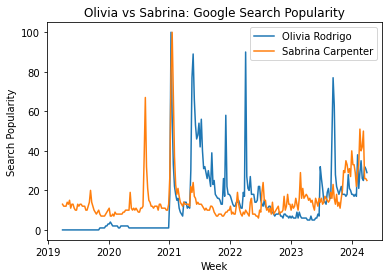

In [11]:
plt.plot(olivia_poptrend['Week'], olivia_poptrend['Olivia Rodrigo: (Worldwide)'], label = "Olivia Rodrigo")
plt.plot(sabrina_poptrend['Week'], sabrina_poptrend['Sabrina Carpenter: (Worldwide)'], label = "Sabrina Carpenter")
plt.xlabel("Week")
plt.ylabel("Search Popularity")
plt.title("Olivia vs Sabrina: Google Search Popularity")
plt.legend()
plt.show()

In [12]:
olivia_poptrend.loc[olivia_poptrend['Olivia Rodrigo: (Worldwide)'] == max(olivia_poptrend['Olivia Rodrigo: (Worldwide)'])]

,Week,Olivia Rodrigo: (Worldwide)
93,2021-01-10,100


In [13]:
sabrina_poptrend.loc[sabrina_poptrend['Sabrina Carpenter: (Worldwide)'] == max(sabrina_poptrend['Sabrina Carpenter: (Worldwide)'])]

,Week,Sabrina Carpenter: (Worldwide)
94,2021-01-17,100


In [14]:
sab_peaks = []

for i in sabrina_poptrend['Sabrina Carpenter: (Worldwide)'].nlargest(10).tolist():
    date = sabrina_poptrend.loc[sabrina_poptrend['Sabrina Carpenter: (Worldwide)'] == i]
    sab_peaks.append(date)
    
sab_peaks

[         Week  Sabrina Carpenter: (Worldwide)
 94 2021-01-17                             100,
          Week  Sabrina Carpenter: (Worldwide)
 93 2021-01-10                              77,
          Week  Sabrina Carpenter: (Worldwide)
 95 2021-01-24                              68,
          Week  Sabrina Carpenter: (Worldwide)
 71 2020-08-09                              67,
           Week  Sabrina Carpenter: (Worldwide)
 255 2024-02-18                              51,
           Week  Sabrina Carpenter: (Worldwide)
 258 2024-03-10                              50,
           Week  Sabrina Carpenter: (Worldwide)
 257 2024-03-03                              42,
           Week  Sabrina Carpenter: (Worldwide)
 248 2023-12-31                              40
 256 2024-02-25                              40,
           Week  Sabrina Carpenter: (Worldwide)
 248 2023-12-31                              40
 256 2024-02-25                              40,
          Week  Sabrina Carpenter: (Wor

In [15]:
liv_peaks = []

for i in olivia_poptrend['Olivia Rodrigo: (Worldwide)'].nlargest(10).tolist():
    date = olivia_poptrend.loc[olivia_poptrend['Olivia Rodrigo: (Worldwide)'] == i]
    liv_peaks.append(date)
    
liv_peaks

[         Week  Olivia Rodrigo: (Worldwide)
 93 2021-01-10                          100,
           Week  Olivia Rodrigo: (Worldwide)
 157 2022-04-03                           90,
           Week  Olivia Rodrigo: (Worldwide)
 112 2021-05-23                           89,
           Week  Olivia Rodrigo: (Worldwide)
 111 2021-05-16                           77
 232 2023-09-10                           77,
           Week  Olivia Rodrigo: (Worldwide)
 111 2021-05-16                           77
 232 2023-09-10                           77,
           Week  Olivia Rodrigo: (Worldwide)
 113 2021-05-30                           66,
           Week  Olivia Rodrigo: (Worldwide)
 233 2023-09-17                           63,
           Week  Olivia Rodrigo: (Worldwide)
 140 2021-12-05                           58,
          Week  Olivia Rodrigo: (Worldwide)
 94 2021-01-17                           57,
           Week  Olivia Rodrigo: (Worldwide)
 119 2021-07-11                           56]

In [16]:
pop_princess_2020s = pop_princess.loc[(pop_princess['album_name'] == 'GUTS') | 
                                      (pop_princess['album_name'] == 'GUTS (spilled)') |
                                      (pop_princess['album_name'] == 'SOUR') |
                                      (pop_princess['album_name'] == "emails i can't send") |
                                      (pop_princess['album_name'] == "emails i can't send fwd:")]

pop_princess_2020s

,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,...,time_signature,duration_ms,explicit,track_name,track_number,album_name,key_name,mode_name,key_mode,song_popularity
0,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.440,0.685,6,...,4,165833,True,all-american bitch,1,GUTS (spilled),F#,major,F# major,72
1,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.625,0.864,9,...,4,184783,True,bad idea right?,2,GUTS (spilled),A,major,A major,70
2,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.494,0.537,5,...,4,219724,True,vampire,3,GUTS (spilled),F,major,F major,69
3,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.332,0.376,3,...,4,177212,False,lacy,4,GUTS (spilled),D#,major,D# major,68
4,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,1D06fz3cuob62ysTS8k6gu,album,2024-03-22,2024,day,0.355,0.877,1,...,4,203369,False,ballad of a homeschooled girl,5,GUTS (spilled),C#,major,C# major,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,5kDmlA2g9Y1YCbNo2Ufxlz,album,2022-07-15,2022,day,0.740,0.697,8,...,4,163648,False,Nonsense,9,emails i can't send,G#,major,G# major,88
83,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,5kDmlA2g9Y1YCbNo2Ufxlz,album,2022-07-15,2022,day,0.721,0.666,1,...,4,174539,True,Fast Times,10,emails i can't send,C#,minor,C# minor,64
84,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,5kDmlA2g9Y1YCbNo2Ufxlz,album,2022-07-15,2022,day,0.452,0.536,4,...,5,177750,False,skinny dipping,11,emails i can't send,E,major,E major,58
85,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,5kDmlA2g9Y1YCbNo2Ufxlz,album,2022-07-15,2022,day,0.601,0.538,7,...,4,188337,False,Bad for Business,12,emails i can't send,G,major,G major,58


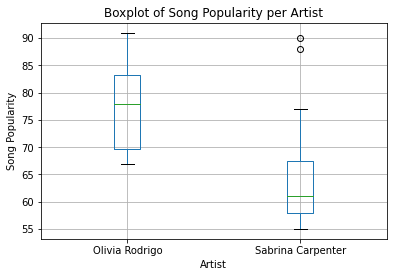

In [17]:
pop_princess_2020s.boxplot(column = 'song_popularity', by = 'artist_name')
plt.xlabel('Artist')
plt.ylabel('Song Popularity')
plt.title("Boxplot of Song Popularity per Artist")
plt.suptitle('') 
plt.show()

In [18]:
sab_popsongs = []
sab_songs = pop_princess.loc[pop_princess['artist_name'] == 'Sabrina Carpenter']

for i in sab_songs['song_popularity'].nlargest(2).tolist():
    date = sab_songs.loc[sab_songs['song_popularity'] == i, ['track_name', 'song_popularity']]
    sab_popsongs.append(date)
    
sab_popsongs

[   track_name  song_popularity
 71    Feather               90,
    track_name  song_popularity
 82   Nonsense               88]

<h2> Comparing Song Characteristics </h2>

In [19]:
liv_songs = pop_princess.loc[pop_princess['artist_name'] == 'Olivia Rodrigo']

In [20]:
sab_songs = pop_princess.loc[(pop_princess['artist_name'] == 'Sabrina Carpenter') &
                             ((pop_princess['album_name'] == "emails i can't send") |
                              (pop_princess['album_name'] == "emails i can't send fwd:"))]

In [21]:
song_char = ['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'tempo']

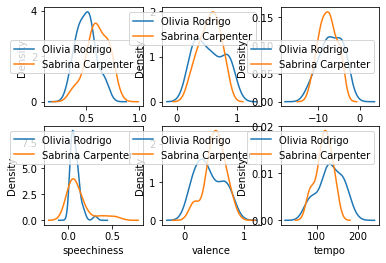

In [22]:
for i in range(1, 7, 1):
    plt.subplot(2, 3, i)
    liv_songs[song_char[i-1]].plot(kind = 'density', label = 'Olivia Rodrigo')
    sab_songs[song_char[i-1]].plot(kind = 'density', label = 'Sabrina Carpenter')
    plt.xlabel(song_char[i-1])
    plt.legend()

plt.rcParams['figure.figsize'] = [15, 4]
plt.show()

In [ ]:
song_char.append('song_popularity')

In [46]:
vampire = liv_songs.loc[liv_songs['song_popularity'] == max(liv_songs['song_popularity']), song_char]

vampire

,danceability,energy,loudness,speechiness,valence,tempo,song_popularity
36,0.511,0.532,-5.745,0.0578,0.35,138.005,91


In [47]:
feather = sab_songs.loc[sab_songs['song_popularity'] == max(sab_songs['song_popularity']), song_char]

feather

,danceability,energy,loudness,speechiness,valence,tempo,song_popularity
71,0.787,0.686,-4.37,0.0339,0.836,123.51,90
